In [80]:
# To enable plotting graphs in Jupyter notebook
%matplotlib inline 

In [81]:
# Numerical libraries
import numpy as np   

# Import Linear Regression machine learning library
from sklearn.linear_model import LinearRegression

# to handle data in form of rows and columns 
import pandas as pd    

# importing ploting libraries
import matplotlib.pyplot as plt   

#importing seaborn for statistical plots
import seaborn as sns

In [82]:
# reading the CSV file into pandas dataframe
mpg_df = pd.read_csv("car-mpg.csv")  

In [51]:
# Check top few records to get a feel of the data structure
mpg_df.shape

(398, 10)

In [83]:
# drop the car name column as it is useless for the model
mpg_df = mpg_df.drop('car_name', axis=1)

In [53]:
mpg_df.shape

(398, 9)

In [84]:
mpg_df.head()

,mpg,cyl,disp,hp,wt,acc,yr,origin,car_type
0,18.0,8,307.0,130,3504,12.0,70,1,0
1,15.0,8,350.0,165,3693,11.5,70,1,0
2,18.0,8,318.0,150,3436,11.0,70,1,0
3,16.0,8,304.0,150,3433,12.0,70,1,0
4,17.0,8,302.0,140,3449,10.5,70,1,0


In [85]:
# Replace the numbers in categorical variables with the actual country names in the origin col
mpg_df['origin'] = mpg_df['origin'].replace({1: 'america', 2: 'europe', 3: 'asia'})

In [56]:
mpg_df['origin'].value_counts()

america    249
asia        79
europe      70
Name: origin, dtype: int64

In [86]:
# Convert categorical variable into dummy/indicator variables. As many columns will be created as distinct values
mpg_df = pd.get_dummies(mpg_df, columns=['origin'])

In [58]:
mpg_df.head()

,mpg,cyl,disp,hp,wt,acc,yr,car_type,origin_america,origin_asia,origin_europe
0,18.0,8,307.0,130,3504,12.0,70,0,1,0,0
1,15.0,8,350.0,165,3693,11.5,70,0,1,0,0
2,18.0,8,318.0,150,3436,11.0,70,0,1,0,0
3,16.0,8,304.0,150,3433,12.0,70,0,1,0,0
4,17.0,8,302.0,140,3449,10.5,70,0,1,0,0


In [87]:
#Lets analysze the distribution of the dependent (mpg) column
mpg_df.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
mpg,398.0,23.514573,7.815984,9.0,17.500,23.0,29.000,46.6
cyl,398.0,5.454774,1.701004,3.0,4.000,4.0,8.000,8.0
disp,398.0,193.425879,104.269838,68.0,104.250,148.5,262.000,455.0
wt,398.0,2970.424623,846.841774,1613.0,2223.750,2803.5,3608.000,5140.0
acc,398.0,15.568090,2.757689,8.0,13.825,15.5,17.175,24.8
yr,398.0,76.010050,3.697627,70.0,73.000,76.0,79.000,82.0
car_type,398.0,0.530151,0.499718,0.0,0.000,1.0,1.000,1.0
origin_america,398.0,0.625628,0.484569,0.0,0.000,1.0,1.000,1.0
origin_asia,398.0,0.198492,0.399367,0.0,0.000,0.0,0.000,1.0
origin_europe,398.0,0.175879,0.381197,0.0,0.000,0.0,0.000,1.0


In [60]:
mpg_df['hp']

0      130
1      165
2      150
3      150
4      140
5      198
6      220
7      215
8      225
9      190
10     170
11     160
12     150
13     225
14      95
15      95
16      97
17      85
18      88
19      46
20      87
21      90
22      95
23     113
24      90
25     215
26     200
27     210
28     193
29      88
      ... 
368     88
369     88
370     85
371     84
372     90
373     92
374      ?
375     74
376     68
377     68
378     63
379     70
380     88
381     75
382     70
383     67
384     67
385     67
386    110
387     85
388     92
389    112
390     96
391     84
392     90
393     86
394     52
395     84
396     79
397     82
Name: hp, Length: 398, dtype: object

In [61]:
# Note:  HP column is missing the describe output. That indicates something is not right with that column

In [88]:
#Check if the hp column contains anything other than digits 
# run the "isdigit() check on 'hp' column of the mpg_df dataframe. Result will be True or False for every row
# capture the result in temp dataframe and dow a frequency count using value_counts()
# There are six records with non digit values in 'hp' column
temp = pd.DataFrame(mpg_df.hp.str.isdigit())


In [89]:
temp[temp['hp'] == False]

,hp
32,False
126,False
330,False
336,False
354,False
374,False


In [90]:
# On inspecting records number 32, 126 etc, we find "?" in the columns. Replace them with "nan"
#Replace them with nan and remove the records from the data frame that have "nan"
mpg_df = mpg_df.replace('?', np.nan)

In [91]:
#Let us see if we can get those records with nan

mpg_df[mpg_df.isnull().any(axis=1)]

,mpg,cyl,disp,hp,wt,acc,yr,car_type,origin_america,origin_asia,origin_europe
32,25.0,4,98.0,NaN,2046,19.0,71,1,1,0,0
126,21.0,6,200.0,NaN,2875,17.0,74,0,1,0,0
330,40.9,4,85.0,NaN,1835,17.3,80,1,0,0,1
336,23.6,4,140.0,NaN,2905,14.3,80,1,1,0,0
354,34.5,4,100.0,NaN,2320,15.8,81,1,0,0,1
374,23.0,4,151.0,NaN,3035,20.5,82,1,1,0,0


In [66]:
# There are various ways to handle missing values. Drop the rows, replace missing values with median values etc. 

In [67]:
#of the 398 rows 6 have NAN in the hp column. We will drop those 6 rows. Not a good idea under all situations
#note: HP is missing becauses of the non-numeric values in the column. 
#mpg_df = mpg_df.dropna()

In [77]:
#instead of dropping the rows, lets replace the missing values with median value. 
mpg_df.median()

mpg                 23.0
cyl                  4.0
disp               148.5
hp                  93.5
wt                2803.5
acc                 15.5
yr                  76.0
car_type             1.0
origin_america       1.0
origin_asia          0.0
origin_europe        0.0
dtype: float64

In [107]:
# replace the missing values in 'hp' with median value of 'hp' :Note, we do not need to specify the column names
# every column's missing value is replaced with that column's median respectively
mpg_df = mpg_df.fillna(mpg_df.median())

In [108]:
mpg_df['hp'].dtype

dtype('float64')

In [110]:
# The "hp" column was treated as an object when data was loaded into the dataframe as it contained "?"

mpg_df['hp']=mpg_df['hp'].astype('float64')
mpg_df.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
mpg,398.0,23.514573,7.815984,9.0,17.500,23.0,29.000,46.6
cyl,398.0,5.454774,1.701004,3.0,4.000,4.0,8.000,8.0
disp,398.0,193.425879,104.269838,68.0,104.250,148.5,262.000,455.0
hp,398.0,104.304020,38.222625,46.0,76.000,93.5,125.000,230.0
wt,398.0,2970.424623,846.841774,1613.0,2223.750,2803.5,3608.000,5140.0
acc,398.0,15.568090,2.757689,8.0,13.825,15.5,17.175,24.8
yr,398.0,76.010050,3.697627,70.0,73.000,76.0,79.000,82.0
car_type,398.0,0.530151,0.499718,0.0,0.000,1.0,1.000,1.0
origin_america,398.0,0.625628,0.484569,0.0,0.000,1.0,1.000,1.0
origin_asia,398.0,0.198492,0.399367,0.0,0.000,0.0,0.000,1.0


In [111]:
#let us look at each attribute and understand it's distribution
mpg_df.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
mpg,398.0,23.514573,7.815984,9.0,17.500,23.0,29.000,46.6
cyl,398.0,5.454774,1.701004,3.0,4.000,4.0,8.000,8.0
disp,398.0,193.425879,104.269838,68.0,104.250,148.5,262.000,455.0
hp,398.0,104.304020,38.222625,46.0,76.000,93.5,125.000,230.0
wt,398.0,2970.424623,846.841774,1613.0,2223.750,2803.5,3608.000,5140.0
acc,398.0,15.568090,2.757689,8.0,13.825,15.5,17.175,24.8
yr,398.0,76.010050,3.697627,70.0,73.000,76.0,79.000,82.0
car_type,398.0,0.530151,0.499718,0.0,0.000,1.0,1.000,1.0
origin_america,398.0,0.625628,0.484569,0.0,0.000,1.0,1.000,1.0
origin_asia,398.0,0.198492,0.399367,0.0,0.000,0.0,0.000,1.0


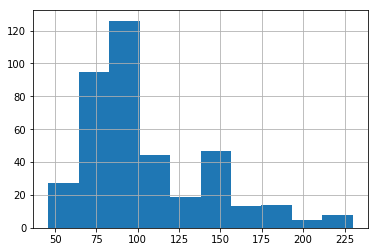

In [112]:
# Study the distribution of the data in each column. Columns which do not have random distributions may not be good 
# for model as random processes cannot be modeled
mpg_df.hp.hist()

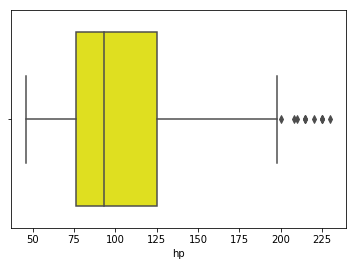

In [113]:
# Let us visually inspect the central values and the spread
sns.boxplot(mpg_df.hp, color = "yellow", orient = "h")

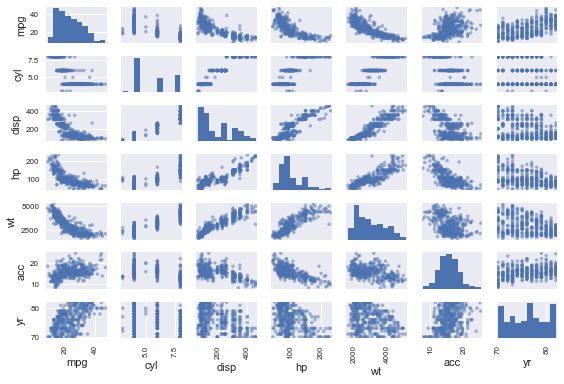

In [171]:
# Let us do a correlation analysis among the different dimensions and also each dimension with the dependent dimension
# This is done using scatter matrix function which creates a dashboard reflecting useful information about the dimensions
# The result can be stored as a .png file and opened in say, paint to get a larger view 

mpg_df_attr = mpg_df.iloc[:,0:7]

axes = pd.plotting.scatter_matrix(mpg_df_attr)
plt.tight_layout()
plt.savefig('mpg_pairpanel.png')

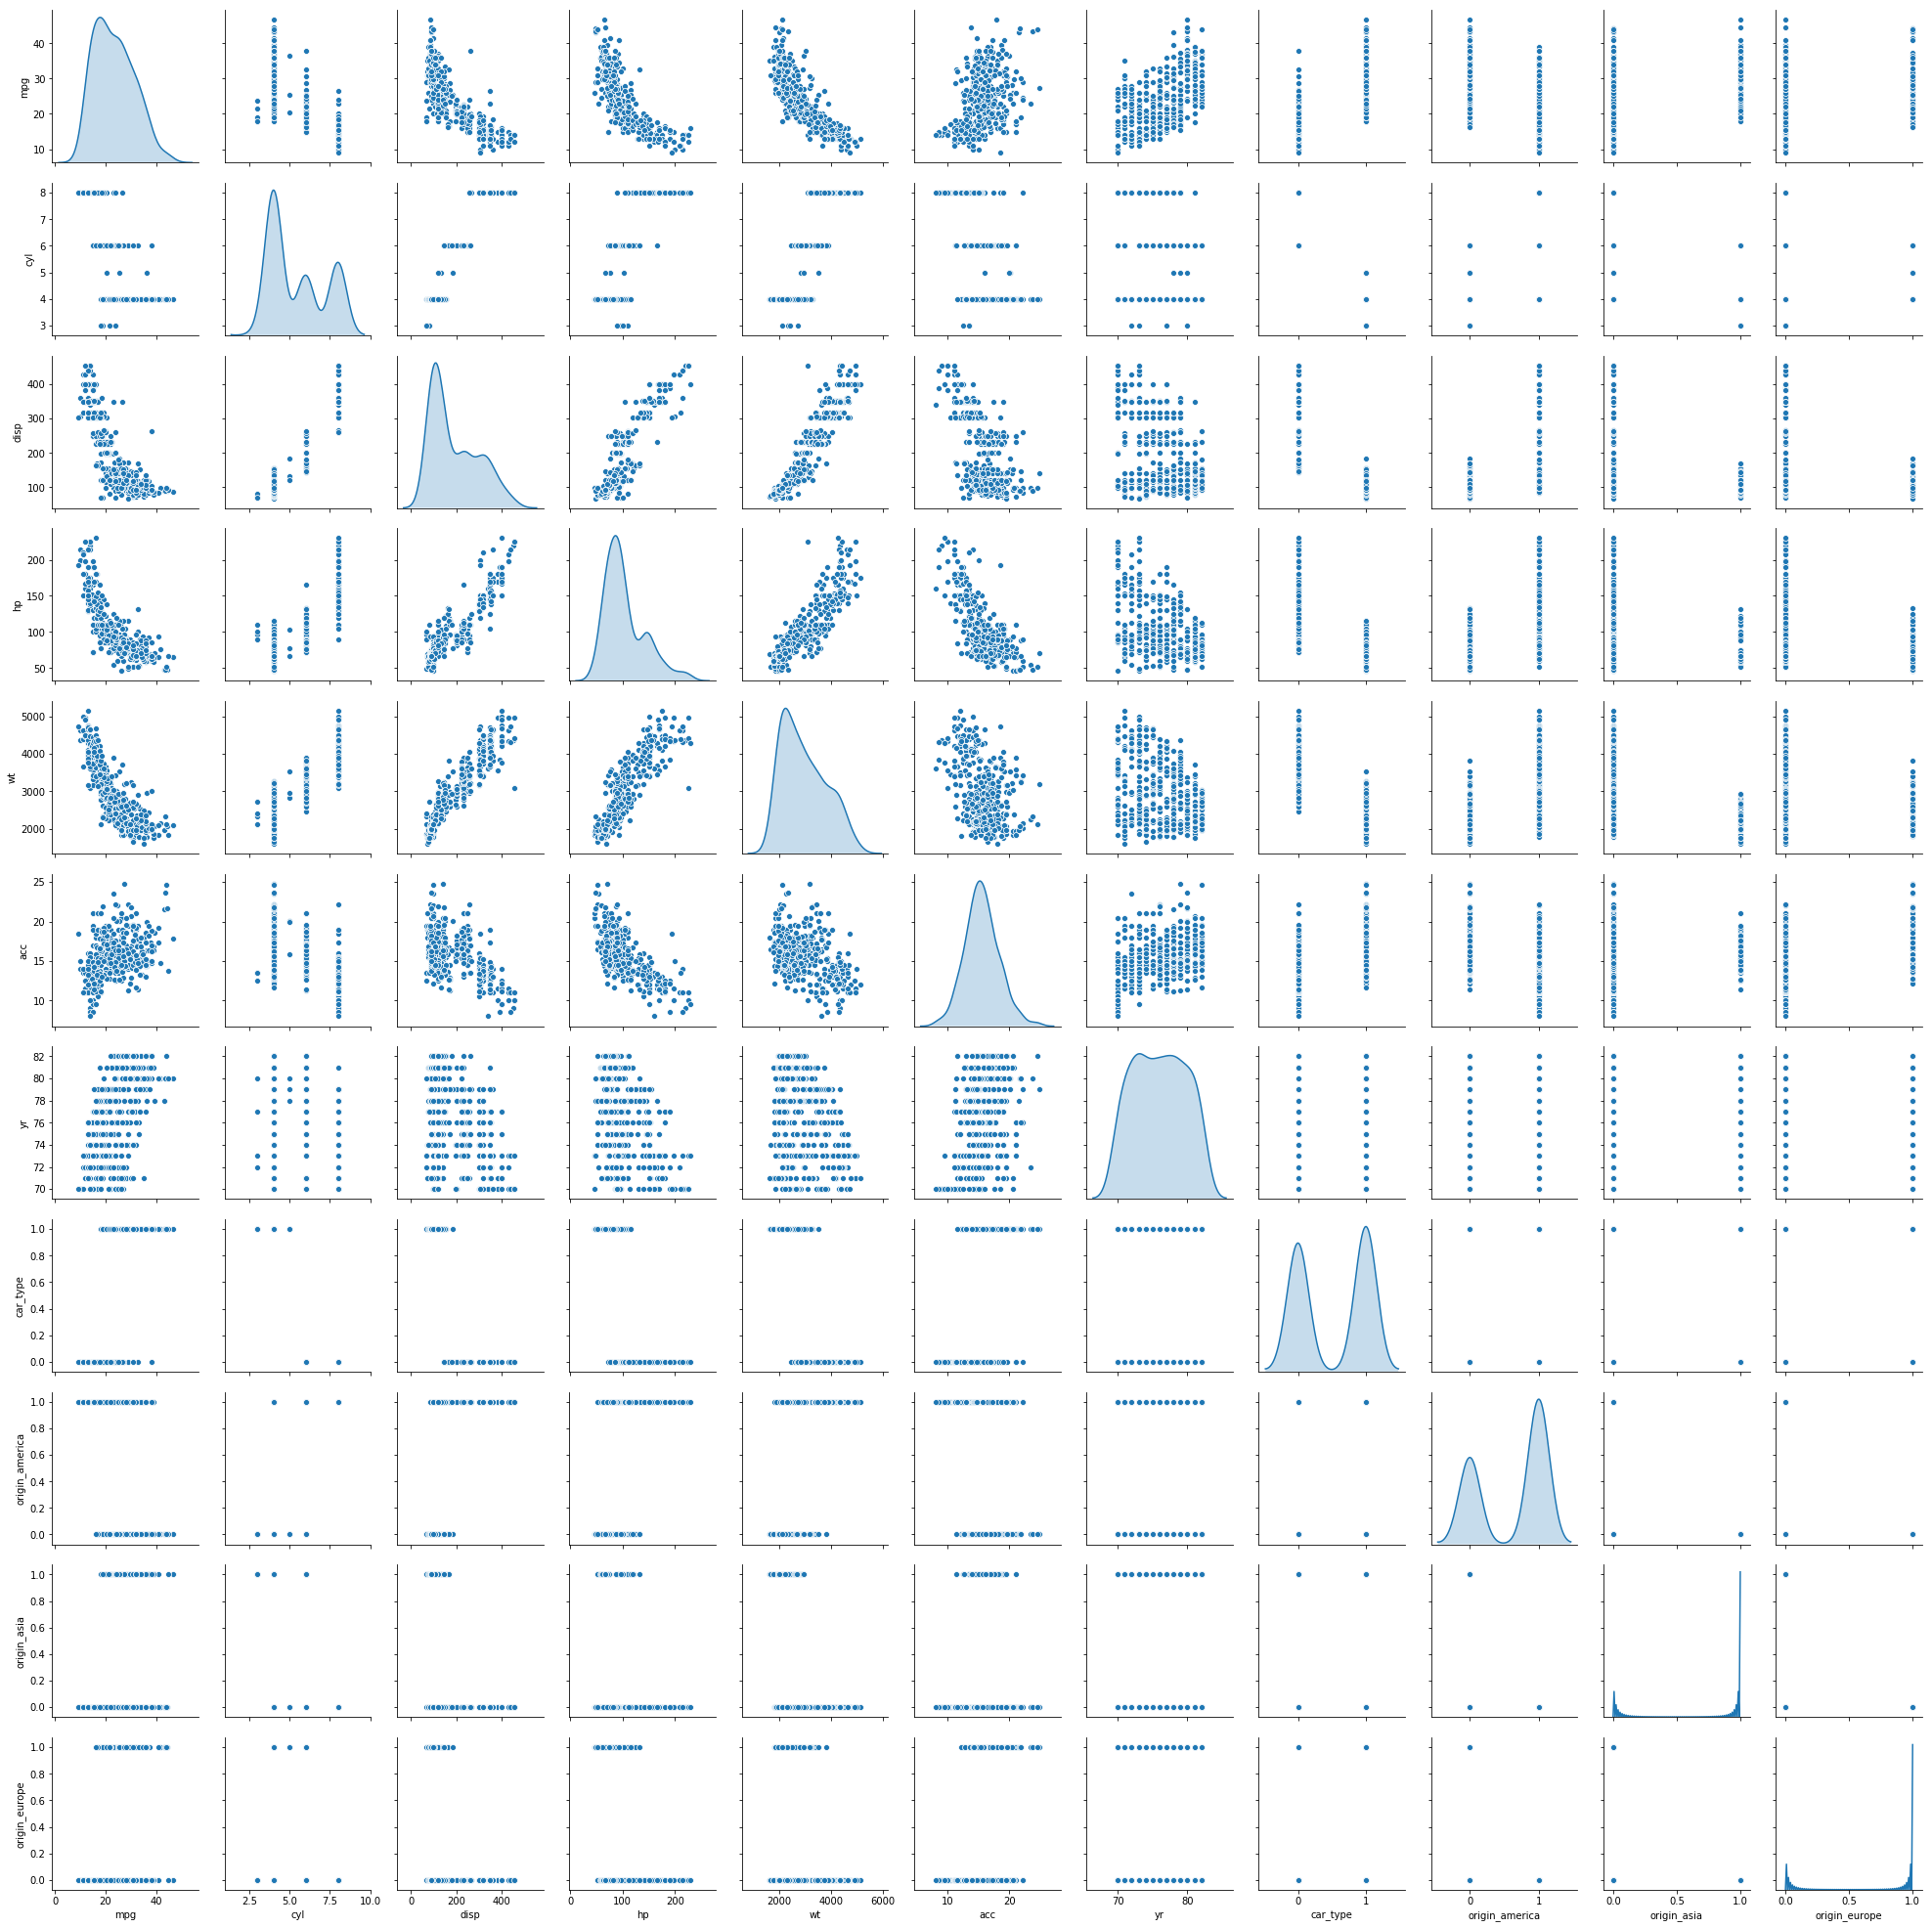

In [114]:
sns.pairplot(mpg_df,diag_kind='kde')

In [172]:
#The data distribution across various dimensions except 'Acc' do not look normal
#Close observation between 'mpg' and other attributes indicate the relationship is not really linear
#relation between 'mpg' and 'hp' show hetroscedacity... which will impact model accuracy
#How about 'mpg' vs 'yr' surprising to see a positive relation

In [117]:
# Copy all the predictor variables into X dataframe. Since 'mpg' is dependent variable drop it
X = mpg_df.drop(['mpg','cyl'], axis=1)

# Copy the 'mpg' column alone into the y dataframe. This is the dependent variable
y = mpg_df[['mpg']]


In [119]:
y.shape

(398, 1)

In [42]:
#Let us break the X and y dataframes into training set and test set. For this we will use
#Sklearn package's data splitting function which is based on random function

from sklearn.model_selection import train_test_split

In [120]:
# Split X and y into training and test set in 75:25 ratio

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=1)

In [121]:
X_train.shape

(278, 9)

In [122]:
X_test.shape

(120, 9)

In [123]:
y_train.shape

(278, 1)

In [124]:
y_test.shape

(120, 1)

In [44]:
# invoke the LinearRegression function and find the bestfit model on training data
regression_model = LinearRegression()
regression_model.fit(X_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

array([1.46099195e+04, 6.28571965e+02, 2.87686396e+02, 5.73388200e+01,
       3.01451733e+01, 9.28204913e+00, 7.32489649e+00, 7.08944870e+00,
       3.06760383e+00, 1.81746222e-15])

In [177]:
# Let us explore the coefficients for each of the independent attributes

for idx, col_name in enumerate(X_train.columns):
    print("The coefficient for {} is {}".format(col_name, regression_model.coef_[0][idx]))

The coefficient for cyl is -0.3587938318113527
The coefficient for disp is 0.029786224589748327
The coefficient for hp is -0.017326691282575718
The coefficient for wt is -0.00755315974082148
The coefficient for acc is 0.11679979864255319
The coefficient for yr is 0.845003689561729
The coefficient for origin_america is -1.9029961213759472
The coefficient for origin_asia is 0.7383618604870851
The coefficient for origin_europe is 1.1646342608888638


In [178]:
# Let us check the intercept for the model

intercept = regression_model.intercept_[0]

print("The intercept for our model is {}".format(intercept))

The intercept for our model is -21.11359559723781


In [179]:
# we can write our linear model as:
# Y=−21.11–0.35×X1+0.03×X2–0.02×X3–0.01×X4+0.12×X5+0.85×X6–1.90×X7+0.74×X8+1.16×X9

In [180]:
# Model score - R2 or coeff of determinant
# R^2=1–RSS / TSS

regression_model.score(X_test, y_test)

0.84423196365199848

In [ ]:
# So the model explains 84.4% of the variability in Y using X

In [181]:
# Let us check the sum of squared errors by predicting value of y for test cases and 
# subtracting from the actual y for the test cases

mse = np.mean((regression_model.predict(X_test)-y_test)**2)

In [182]:
# underroot of mean_sq_error is standard deviation i.e. avg variance between predicted and actual

import math

math.sqrt(mse)

2.921101066036313

In [ ]:
# so there is avg of 3.0 (roundoff) mpg difference from real mpg on an avg

In [183]:
# predict mileage (mpg) for a set of attributes not in the training or test set
y_pred = regression_model.predict(X_test)

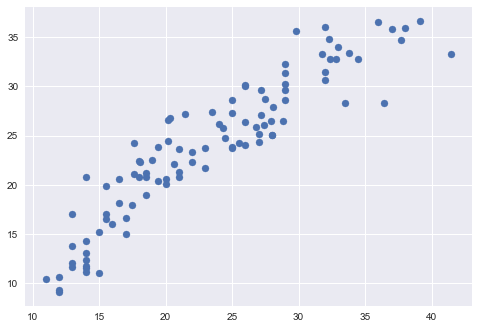

In [184]:
# Since this is regression, plot the predicted y value vs actual y values for the test data
# A good model's prediction will be close to actual leading to high R and R2 values
plt.scatter(y_test, y_pred)

In [ ]:
# ------------------------------------------------- ITERATION 2  ---------------------------------------------------

In [ ]:
# How do we improve the model? the R^2 is .844, how do we improve it
# The indpendent attributes have different units and scales of measurement 
# It is always a good practice to scale all the dimensions using z scores or someother methode to address the problem of different scales 


In [197]:
# To scale the dimensions we need scale function which is part of sckikit preprocessing libraries

from sklearn import preprocessing

# scale all the columns of the mpg_df. This will produce a numpy array
mpg_df_scaled = preprocessing.scale(mpg_df)

In [198]:
mpg_df_scaled

array([[-0.7064387 ,  1.49819126,  1.0906037 , ...,  0.77355903,
        -0.49764335, -0.46196822],
       [-1.09075062,  1.49819126,  1.5035143 , ...,  0.77355903,
        -0.49764335, -0.46196822],
       [-0.7064387 ,  1.49819126,  1.19623199, ...,  0.77355903,
        -0.49764335, -0.46196822],
       ..., 
       [ 1.08701694, -0.85632057, -0.56103873, ...,  0.77355903,
        -0.49764335, -0.46196822],
       [ 0.57460104, -0.85632057, -0.70507731, ...,  0.77355903,
        -0.49764335, -0.46196822],
       [ 0.95891297, -0.85632057, -0.71467988, ...,  0.77355903,
        -0.49764335, -0.46196822]])

In [199]:
#convert the numpy array back into a dataframe 

mpg_df_scaled = pd.DataFrame(mpg_df_scaled, columns=mpg_df.columns)

In [200]:
#browse the contents of the dataframe. Check that all the values are now z scores

mpg_df_scaled

,mpg,cyl,disp,hp,wt,acc,yr,origin_america,origin_asia,origin_europe
0,-0.706439,1.498191,1.090604,0.673118,0.630870,-1.295498,-1.627426,0.773559,-0.497643,-0.461968
1,-1.090751,1.498191,1.503514,1.589958,0.854333,-1.477038,-1.627426,0.773559,-0.497643,-0.461968
2,-0.706439,1.498191,1.196232,1.197027,0.550470,-1.658577,-1.627426,0.773559,-0.497643,-0.461968
3,-0.962647,1.498191,1.061796,1.197027,0.546923,-1.295498,-1.627426,0.773559,-0.497643,-0.461968
4,-0.834543,1.498191,1.042591,0.935072,0.565841,-1.840117,-1.627426,0.773559,-0.497643,-0.461968
5,-1.090751,1.498191,2.262118,2.454408,1.620492,-2.021656,-1.627426,0.773559,-0.497643,-0.461968
6,-1.218855,1.498191,2.502182,3.030708,1.635863,-2.384735,-1.627426,0.773559,-0.497643,-0.461968
7,-1.218855,1.498191,2.367746,2.899730,1.586204,-2.566274,-1.627426,0.773559,-0.497643,-0.461968
8,-1.218855,1.498191,2.511784,3.161685,1.719809,-2.021656,-1.627426,0.773559,-0.497643,-0.461968
9,-1.090751,1.498191,1.887617,2.244844,1.039961,-2.566274,-1.627426,0.773559,-0.497643,-0.461968


In [201]:
# Copy all the predictor variables into X dataframe. Since 'mpg' is dependent variable drop it
X = mpg_df_scaled.drop('mpg', axis=1)

# Copy the 'mpg' column alone into the y dataframe. This is the dependent variable
y = mpg_df_scaled[['mpg']]


In [202]:
# Split X and y into training and test set in 75:25 ratio

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=1)

In [203]:
# invoke the LinearRegression function and find the bestfit model on training data

regression_model = LinearRegression()
regression_model.fit(X_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

In [204]:
# Let us explore the coefficients for each of the independent attributes

for idx, col_name in enumerate(X_train.columns):
    print("The coefficient for {} is {}".format(col_name, regression_model.coef_[0][idx]))

The coefficient for cyl is -0.07808483313384415
The coefficient for disp is 0.3973657946972272
The coefficient for hp is -0.08473297726998189
The coefficient for wt is -0.8183654086190686
The coefficient for acc is 0.041210102124063966
The coefficient for yr is 0.39975875515609055
The coefficient for origin_america is -0.09961619757213232
The coefficient for origin_asia is 0.05286275347891442
The coefficient for origin_europe is 0.07124754231534776


In [205]:
# Model score - R2 or coeff of determinant
# R^2=1–RSS / TSS

regression_model.score(X_test, y_test)

0.84423196365200093

In [206]:
# Let us check the sum of squared errors by predicting value of y for test cases and 
# subtracting from the actual y for the test cases

mse = np.mean((regression_model.predict(X_test)-y_test)**2)

In [207]:
# underroot of mean_sq_error is standard deviation i.e. avg variance between predicted and actual

import math

math.sqrt(mse)

0.37420465597832564

In [208]:
# predict mileage (mpg) for a set of attributes not in the training or test set
y_pred = regression_model.predict(X_test)

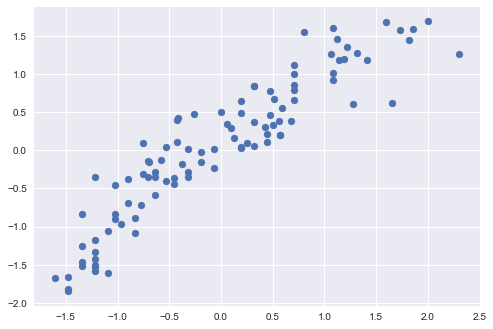

In [209]:
# Since this is regression, plot the predicted y value vs actual y values for the test data
# A good model's prediction will be close to actual leading to high R and R2 values
plt.scatter(y_test, y_pred)

In [ ]:
# -------------------------------------------    ITERATION - 3  ---------------------------------------------- 

In [272]:
# Since "mpg" and "Acc" seem to have very weak correlation. Let us drop "ACC" from the model 
# Copy all the predictor variables into X dataframe. Since 'mpg' is dependent variable drop it
X = mpg_df_scaled.drop('mpg', axis=1)
X = X.drop('acc', axis=1)
X = X.drop('origin_america', axis=1)
X = X.drop('origin_asia', axis=1)
X = X.drop('origin_europe', axis=1)
#X = X.drop('yr', axis=1)
X

,cyl,disp,hp,wt,yr
0,1.498191,1.090604,0.673118,0.630870,-1.627426
1,1.498191,1.503514,1.589958,0.854333,-1.627426
2,1.498191,1.196232,1.197027,0.550470,-1.627426
3,1.498191,1.061796,1.197027,0.546923,-1.627426
4,1.498191,1.042591,0.935072,0.565841,-1.627426
5,1.498191,2.262118,2.454408,1.620492,-1.627426
6,1.498191,2.502182,3.030708,1.635863,-1.627426
7,1.498191,2.367746,2.899730,1.586204,-1.627426
8,1.498191,2.511784,3.161685,1.719809,-1.627426
9,1.498191,1.887617,2.244844,1.039961,-1.627426


In [273]:
# Split X and y into training and test set in 75:25 ratio

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=1)

In [274]:
# invoke the LinearRegression function and find the bestfit model on training data

#regression_model = LinearRegression()
regression_model.fit(X_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

In [275]:
# Let us explore the coefficients for each of the independent attributes

for idx, col_name in enumerate(X_train.columns):
    print("The coefficient for {} is {}".format(col_name, regression_model.coef_[0][idx]))


The coefficient for cyl is -0.022969477795430654
The coefficient for disp is 0.12401686933900509
The coefficient for hp is -0.05344468782365348
The coefficient for wt is -0.770957141336008
The coefficient for yr is 0.3767454014273224


In [276]:
# Let us check the sum of squared errors by predicting value of y for test cases and 
# subtracting from the actual y for the test cases

mse = np.mean((regression_model.predict(X_test)-y_test)**2)

In [277]:
# Model score - R2 or coeff of determinant
# R^2=1–RSS / TSS

regression_model.score(X_test, y_test)

0.82863122237927145

In [278]:
# underroot of mean_sq_error is standard deviation i.e. avg variance between predicted and actual

import math

math.sqrt(mse)

0.3924965681042627

In [279]:
# predict mileage (mpg) for a set of attributes not in the training or test set
y_pred = regression_model.predict(X_test)

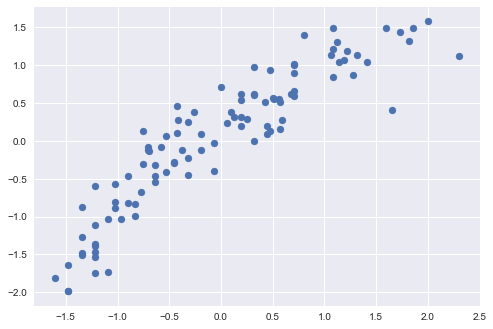

In [280]:
# Since this is regression, plot the predicted y value vs actual y values for the test data
# A good model's prediction will be close to actual leading to high R and R2 values
plt.scatter(y_test, y_pred)